## Introduction

Hi! Our group is made up of the three of us, **Alexis, Tom, and Panos** and we're excited to share our project with you. 

Initially, we just started searching around the WPRDC for datasets that were relatively interesting and also had a neighborhood column, or something similar. We threw around some datasets like overdoses and obesity rates, among other things. After finding some datasets on firearm seizures and crime, we decided that safety was going to be the theme for our project.

## The Metric

We're using three different datasets (one for each of us.) Alexis's dataset is [Firearm Seizures](https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4), Panos's dataset is [Police Arrest Data](https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f), and Tom's dataset is on  [Non-Traffic Citations](https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4)

By manipulating our respective datasets, we plan to sort the neighborhoods from least amount of incidents to most incidents. Our metric is safety, therefore the neighborhood with the least incidents is the safest and, according to our metric, the best. 

## The Best Neighborhood 

First, we have results and some visuals from our individual data sets. You might notice some data frames labeled df_norm. Those are for our final merged result, so we'll get to that later.

In [62]:
# let's import all the important stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

### Alexis's Findings: Firearm seizures

The neighborhoods with the five lowest total counts in my dataset were:
1. Lincoln  Place 
2. Oakwood
3. Summer Hill (tie)
4. Regent Square (tie)
5. Mount Oliver (tie)

In [3]:
# imports csv and drops incidents without neighborhoods
firearm = pd.read_csv("firearm-seizures-data.csv")
firearm.dropna(subset = ["neighborhood"], inplace=True)

# for normalizing data
firearm_norm = firearm.rename(columns={'neighborhood': 'hood'})

# sums total_count by neighborhood
firearm_norm['total_count'] = pd.to_numeric(firearm_norm['total_count'])
firearm_norm = firearm_norm.groupby('hood')['total_count'].sum()
fire_final = pd.DataFrame(firearm_norm)

# sorting
pd.set_option('display.max_rows', None)
fire_final = fire_final.sort_values(['total_count', 'hood'], ascending=[1, 0])
#fire_final.head(10)

#### Visuals

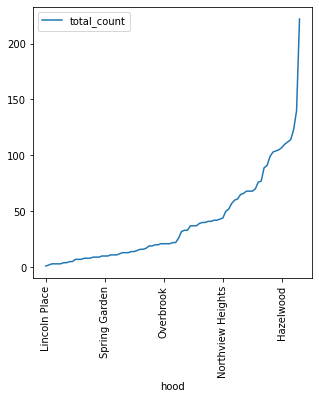

In [4]:
# line graph
fire_final.plot(rot=90, figsize=(5,5))

In [5]:
# better chart view
firearm = firearm.drop(columns=['tract','police_zone','fire_zone','latitude','longitude','ward',
                            'council_district','address','public_works_division'])
firearm.head(5)

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood
1,1,0,1,0,0,0,2017,4,6,Bluff
2,1,0,1,0,0,0,2015,8,1,Bluff
3,1,0,0,1,0,0,2015,11,5,Homewood West
4,1,0,1,0,0,0,2016,9,0,Manchester
5,1,0,1,0,0,0,2016,9,6,Brookline


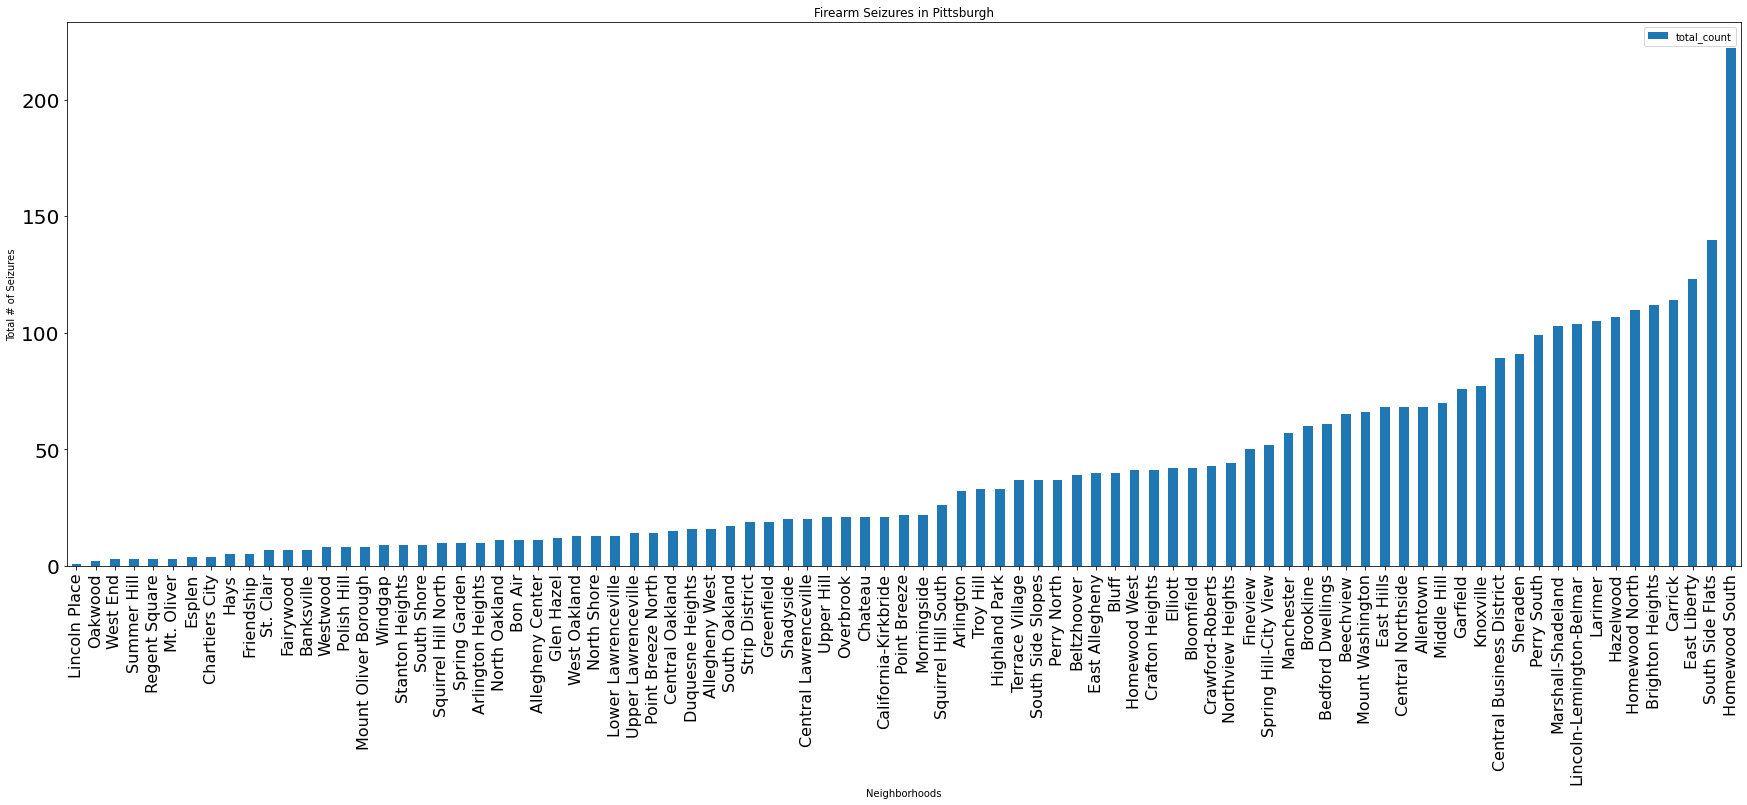

In [6]:
# bar chart
fire_final.plot(kind='bar', stacked=True, figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.title("Firearm Seizures in Pittsburgh")
plt.xlabel("Neighborhoods")
plt.ylabel("Total # of Seizures")
plt.style.use('seaborn-white')

### Tom's Findings: Non-Traffic Citations

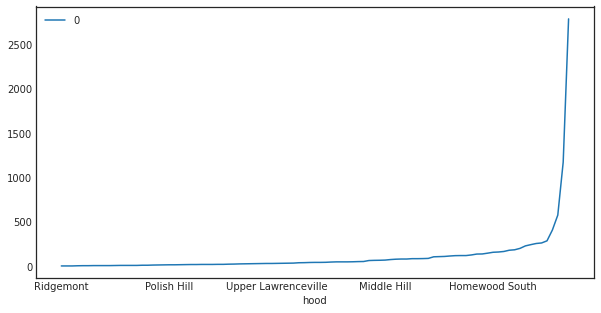

In [44]:
citations = pd.read_csv("non-traffic-citations.csv")

citations.dropna(subset = ['NEIGHBORHOOD'], inplace = True)

# for normalizing data
citations_norm = citations.rename(columns={'NEIGHBORHOOD': 'hood'})

citations_norm = citations_norm.groupby('hood').size().to_frame('citations_count')
#print(citations_norm) 

citations_sum = pd.DataFrame(citations_sum)

#print(citations_sum)

citations_sum.plot(figsize=(10,5))

### Panos's Findings: Police Arrests

hood
Mt. Oliver Neighborhood           2
Troy Hill-Herrs Island            6
Mt. Oliver Boro                  16
Regent Square                    22
Central Northside                23
Ridgemont                        24
New Homestead                    26
Swisshelm Park                   27
Chartiers City                   28
St. Clair                        35
East Carnegie                    36
Outside County                   41
Outside State                    45
Oakwood                          54
Summer Hill                      58
Fairywood                        74
Hays                             75
Windgap                          76
Golden Triangle/Civic Arena      83
Allegheny West                   85
Glen Hazel                       90
Mount Oliver                     96
Arlington Heights               109
Polish Hill                     114
Esplen                          121
Friendship                      122
Lincoln Place                   124
Duquesne Heights       

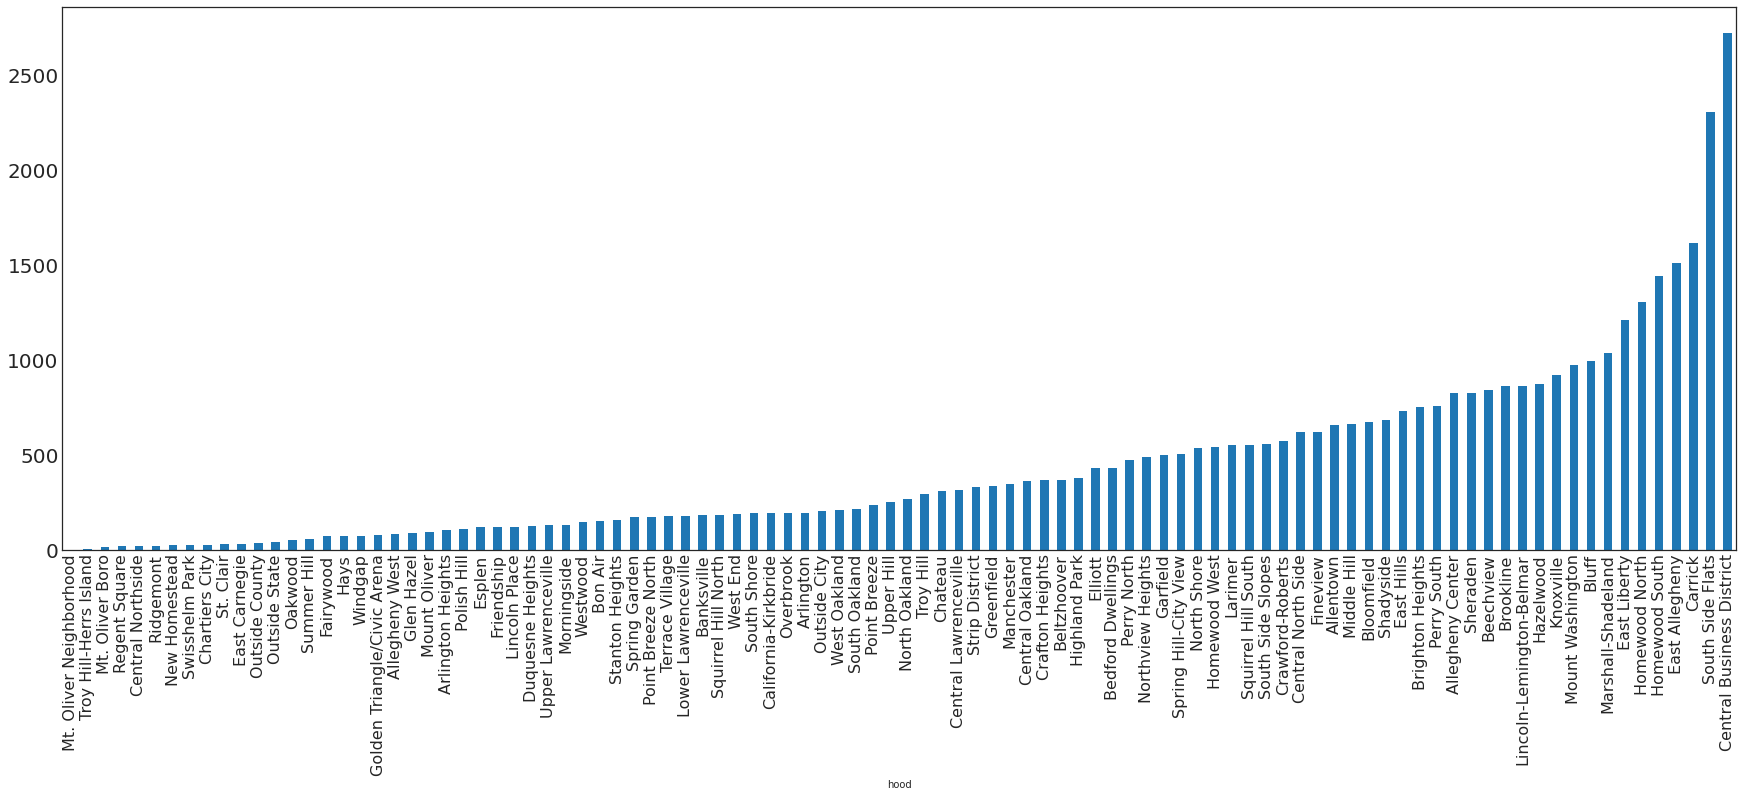

In [45]:
arrests = pd.read_csv("pittsburgh-police-arrest-data.csv")

arrests.dropna(subset = ["INCIDENTNEIGHBORHOOD"], inplace=True)
#pd.set_option("display.max_rows", None)

# for normalizing data
arrests_norm = arrests.rename(columns={'INCIDENTNEIGHBORHOOD': 'hood'})

arrests_sum = arrests_norm.groupby('hood').size().sort_values(ascending=True)
print(arrests_sum)

arrests_sum.plot(kind='bar', stacked=True, figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.style.use('seaborn-white')

### Group Findings

Here's the big reveal! The code blocks below merges all three datasets. We did this by merging on the column "hood." The counts for each dataframe were sized and made into their own total counts. Then, the respective totals for each data set are added into one final column called "total." The neighborhood with the lowest total is the "best neighborhood", and that turned out to be...... **Regent Square!**

Regent Square had the lowest number on incidents; only 32 incidents total. This neighborhood borders Frick Park and Edgewood. It probably has the lowest total incidents because of its location and small population.

*Side note: South Side Flats appears to overwhelmingly the worst/least safe neighborhood*

Check out the code for it all below and some graphs too.

In [91]:
# normalization for merged dataframe 1
firearm_norm = pd.DataFrame(firearm_norm)

# normalization for merged dataframe 3
arrest_norm = arrests_norm.groupby('hood').size().to_frame('arrests_count')
#arrest_norm.head(10)

In [52]:
# merged the datasets
merged = firearm_norm.merge(citations_norm,on='hood').merge(arrest_norm,on='hood')
# made a total column
merged['total'] = merged.loc[:,['total_count','arrests_count','citations_count']].sum(axis=1)
merged.head(5)

,total_count,citations_count,arrests_count,total
hood,,,,
Allegheny Center,11,125,828,964
Allegheny West,16,15,85,116
Allentown,68,113,659,840
Arlington,32,47,198,277
Arlington Heights,10,6,109,125


In [90]:
merge  = merged.groupby('hood')['total'].sum().sort_values(ascending=True)
merge = pd.DataFrame(merge)

# sorting
pd.set_option('display.max_rows', None)
merge = merge.sort_values(['total', 'hood'], ascending=[1, 0])
merge.head(10)

,total
hood,
Regent Square,32
St. Clair,45
Oakwood,61
Summer Hill,66
Hays,85
Fairywood,90
Windgap,96
Glen Hazel,114
Allegheny West,116


Text(0, 0.5, 'Total # of Incidents')

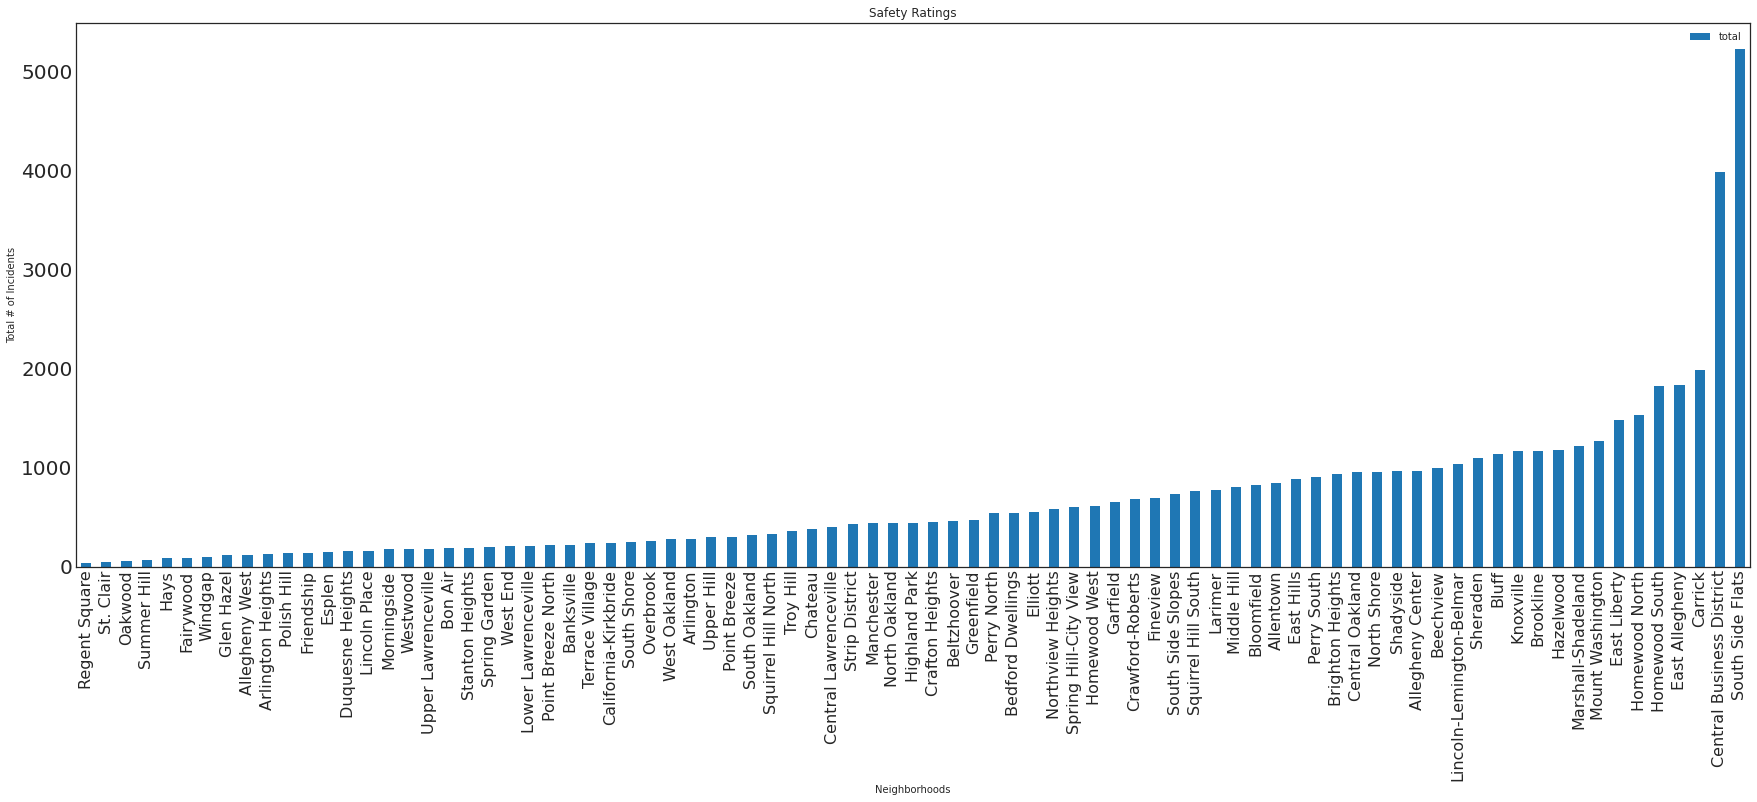

In [61]:
# bar chart 
merge.plot(kind='bar', stacked=True, figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.title("Safety Ratings")
plt.xlabel("Neighborhoods")
plt.ylabel("Total # of Incidents")

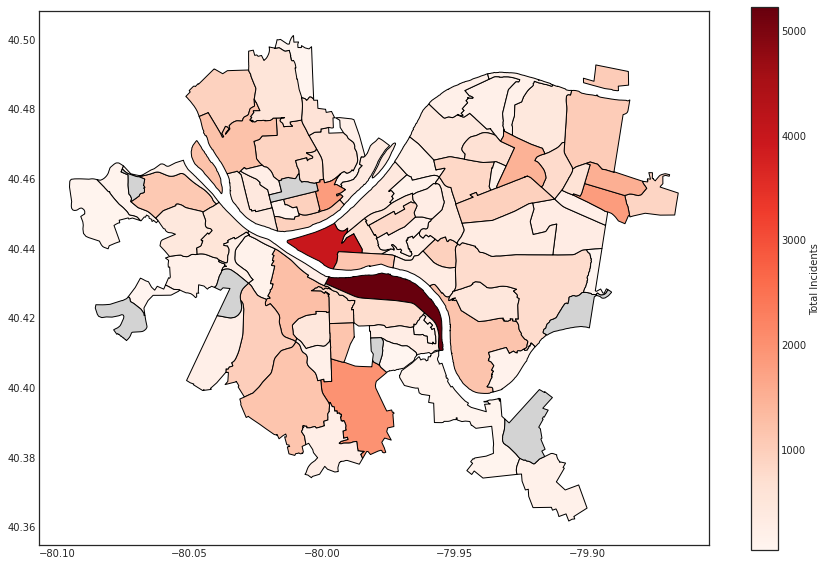

In [89]:
# Geopandas map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
total_map = neighborhoods.merge(merge, how='left', left_on='hood', right_on='hood')

total_map.plot(column='total', 
               cmap='Reds',              
               edgecolor="black",       
               legend=True,             
               legend_kwds={'label': "Total Incidents"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

## Conclusion

**Alexis:** My favorite neighborhood in Pittsburgh that's not Oakland, is probably downtown, or as it appears in our dataset "Central Business District." It is VERY different from what we have determined or will determine to be the best neighborhood, as it has some of the highest number of incidents in our datasets. However, what makes downtown one of my favorite neighborhoods is all the nostalgia it brings. I grew up entering gingerbread houses in the Winter Garden, skating around tree, and walking around market district (if you're not from pgh this might be a little confusing). Our best neighborhood is based on safety, not on fun or nostalgia, so I'm using a different metric for my personal favorite, which is okay! 

**Panos:** My favorite neighborhood that is not Oakland is the South Side Flats. I am not originally from Pittsburgh so I am not familiar with many of the neighberhoods around here. However, when I visited South Side I enjoyed all the small stores and the liveliness. According to my arrests data however, the South Side Flats is the neighberhood with the second highests arrest counts. So perhaps it is best to visit this neighberhood instead of living there.

**Tom:** My favorite neighborhood in Pittsburgh has been Mt. Washington.  I am also not from Pittsburgh so when I first visited the city and saw the view from the top of Mt. Washington I was shocked in how beautiful Pittsburgh was.  Mt. Washington is ranked near the bottom as one of the least safest neighborhoods based on the metrics we used.  With the short time I have spent in the Mt. Washington area, I was not very suprised that it had a higher crime rate as it is a large tourist area.  Although Mt. Washington was not very safe based on our crime based metric, it is still my favorite neighborhood.  I just probably would look to settle down in a neighborhood similar to Reagent Square.